## 01. 데이터 전처리 기초

### 결측치 및 자료 형태 확인

현실에서 데이터를 수집하다보면 데이터의 일부를 얻지 못하거나 누락되는 결측(missing) 데이터가 생긴다. 이 결측치로 인헤 모델링이나 데이터 처리 과정에서 에러가 발생하므로 결측치를 제거하거나 보간해야 한다.

데이터프레임에 결측 데이터는 `NaN`(not a number) 값으로 저장된다. 주의할 점은 `NaN`값은 부동소수점 실수 자료형에만 있는 값이므로 정수 자료를 데이터프레임에 넣을 때는 `Int64Dtype` 자료형을 명시해주어야 하고 시간 자료형을 넣을 때도 `parse_dates` 인수로 날짜시간형 파싱을 해주어야 `datetime64[ns]` 자료형이 되어 결측 데이터가 `NaT`(not a time) 값으로 표시된다.

In [2]:
# !pip install pykrx

In [1]:
import pykrx as px
import time
import tqdm
import pandas as pd
import numpy as np
etf_list = px.stock.get_etf_ticker_list()

In [4]:
etf_data = pd.DataFrame()

for i in tqdm.tqdm(etf_list[:50]) :
    etf_data = pd.concat(
        [etf_data, px.stock.get_market_ohlcv("20230201", "20240227", i)['종가']],
        axis = 1
    )
    time.sleep(1) # time sleep, 이 과정을 생략할 경우 중간에 요청이 중단될 수 있음.
etf_data.columns = etf_list[:50]

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:51<00:00,  1.03s/it]


판다스 데이터프레임의 `isnull()` 또는 `isna()` 메서드로 사용하면 결측 데이터의 위치를 알아내는 것이 가능하다. 

In [5]:
etf_data.isnull()

,470320,466810,457930,487750,445690,465780,442260,159800,472840,361580,...,442570,234310,241390,401170,300640,266160,481430,282000,114100,451670
2023-11-14,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2023-11-15,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2023-11-16,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2023-11-17,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2023-11-20,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13,True,True,True,True,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2023-06-14,True,True,True,True,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2023-06-15,True,True,True,True,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2023-06-16,True,True,True,True,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


데이터를 보면 470320, 466810, 472840 등 몇 column에 결측치가 존재하는 것을 확인할 수 있다.
하지만 데이터가 많은 경우에는 일일히 확인하는 것은 비효율적이며 `sum()` 메서드를 결합하여 결측 데이터의 갯수를 확인하는 것이 더 효율적이다.

In [6]:
etf_data.isnull().sum()

470320    193
466810    175
457930     94
487750    264
445690      0
465780    160
442260      0
159800      0
472840    220
361580      0
290080      0
284980      0
252400      0
252420      0
252410      0
475720    264
148020      0
464540    135
483230    264
448600      0
465330    153
465350    153
422420      0
105780      0
469070    178
477080    264
290130      0
367760      0
367770      0
427110      0
388280      0
427120      0
326240      0
385560      0
479520    264
469580    190
270800      0
292050      0
442550      0
442560      0
442570      0
234310      0
241390      0
401170      0
300640      0
266160      0
481430    264
282000      0
114100      0
451670      9
dtype: int64

혹은 데이터프레임의 `info()` 메소드를 이용해 결측치 유무나 데이터 type 등을 손쉽게 확인 가능하다.

In [7]:
etf_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 2023-11-14 00:00:00 to 2023-06-19 00:00:00
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   470320  71 non-null     float64
 1   466810  89 non-null     float64
 2   457930  170 non-null    float64
 3   487750  0 non-null      float64
 4   445690  264 non-null    int64  
 5   465780  104 non-null    float64
 6   442260  264 non-null    int64  
 7   159800  264 non-null    int64  
 8   472840  44 non-null     float64
 9   361580  264 non-null    int64  
 10  290080  264 non-null    int64  
 11  284980  264 non-null    int64  
 12  252400  264 non-null    int64  
 13  252420  264 non-null    int64  
 14  252410  264 non-null    int64  
 15  475720  0 non-null      float64
 16  148020  264 non-null    int64  
 17  464540  129 non-null    float64
 18  483230  0 non-null      float64
 19  448600  264 non-null    int64  
 20  465330  111 non-null    float64
 21  465350  11

데이터 type을 확인해주는 것도 매우 중요한데, 몇몇 파이썬 라이브러리의 경우 숫자 데이터도 문자 type으로 제공하는 경우가 있어 후에 에러를 발생시키는 경우가 존재하기 때문이다.

In [8]:
import pandas_datareader as pdr
start_date = '2000-01-01'
end_date = '2024-02-27'
ticker = '005930'
data_kor = pdr.DataReader(
    ticker, "naver", start_date, end_date
)

In [9]:
data_kor

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,6000,6110,5660,6110,1483967
2000-01-05,5800,6060,5520,5580,1493604
2000-01-06,5750,5780,5580,5620,1087810
2000-01-07,5560,5670,5360,5540,806195
2000-01-10,5600,5770,5580,5770,937615
...,...,...,...,...,...
2024-02-21,73400,73700,72900,73000,11503495
2024-02-22,73800,73900,72700,73100,15208934
2024-02-23,73600,74200,72900,72900,16225166


겉으로만 봤을때는 좋은 데이터가 만들어진 것 같으나, 이 데이터를 조작하는 과정에서 에러가 발생한다. 예를 들어 하루 고가에서 저가를 뺀 차이를 확인하고자 한다고 해보자

In [10]:
HL_DIFF=data_kor.High - data_kor.Low

TypeError: unsupported operand type(s) for -: 'str' and 'str'

이는 `pandas_datareader`의 경우 데이터를 `float`나 `int`형이 아닌 `str`형으로 제공하기 때문에 발생하는 에러이다. 이런 에러를 미리 방지하기 위해 데이터를 불러오고 `info()`를 확인하는 습관을 길러두면 좋다

In [11]:
data_kor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5962 entries, 2000-01-04 to 2024-02-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    5962 non-null   object
 1   High    5962 non-null   object
 2   Low     5962 non-null   object
 3   Close   5962 non-null   object
 4   Volume  5962 non-null   object
dtypes: object(5)
memory usage: 279.5+ KB


이런 경우는 데이터 형의 변환을 수행해야 한다.  `astype`메소드를 이용해 편리하게 수행이 가능하다.

In [12]:
data_kor=data_kor.astype(int)
data_kor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5962 entries, 2000-01-04 to 2024-02-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Open    5962 non-null   int32
 1   High    5962 non-null   int32
 2   Low     5962 non-null   int32
 3   Close   5962 non-null   int32
 4   Volume  5962 non-null   int32
dtypes: int32(5)
memory usage: 163.0 KB


### 결측치 처리 방법

결측치를 처리해야만 데이터 분석을 수행할 수 있다. 결측치가 데이터에 존재한다면 모델링 과정 중 에러가 발생하는 경우가 매우 많다.

결측된 데이터를 처리하는 방법은 두 가지다.

* 결측된 데이터가 너무 많은 경우 해당 데이터 열 전체를 삭제할 수 있다.
* 결측된 데이터가 일부인 경우 가장 그럴듯한 값으로 대체할 수 있다. 이를 **결측 데이터 대체(imputation)**라고 한다.

판다스의 `dropna()` 메서드를 사용하면 결측 데이터가 존재하는 행이나 열을 지울 수 있다. 다음 코드는 위에서 예로 든 `etf_data` 데이터프레임에서 결측 데이터가 존재하는 모든 행을 지운다.

In [13]:
etf_data.dropna()

,470320,466810,457930,487750,445690,465780,442260,159800,472840,361580,...,442570,234310,241390,401170,300640,266160,481430,282000,114100,451670


`dropna()` 메소드의 인수로 `axis` 인수를 1로 설정한다면 결측치가 존재하는 행이 아닌 열을 제거한다.

In [14]:
etf_data.dropna(axis=1)

,445690,442260,159800,361580,290080,284980,252400,252420,252410,148020,...,442550,442560,442570,234310,241390,401170,300640,266160,282000,114100
2023-11-14,11860,11229,24531,17710,6864,7936,14170,2690,6030,32400,...,10460,10545,10590,13334,11258,6375,9008,11473,108515,104717
2023-11-15,11930,11459,25085,18085,6884,8037,14775,2575,5895,33081,...,10515,10595,10650,13507,11336,6550,9143,11618,108025,105126
2023-11-16,12050,11499,25124,18070,6898,8037,14755,2580,5900,33067,...,10440,10580,10530,13626,11380,6540,9193,11646,108015,105179
2023-11-17,12000,11430,24968,17975,6889,7969,14570,2610,5940,32896,...,10445,10465,10515,13477,11341,6290,8804,11641,107910,105263
2023-11-20,12060,11513,25144,18110,6884,8008,14825,2560,5885,33131,...,10470,10550,10590,13651,11400,6425,9018,11680,107955,105325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13,12100,11631,25801,18615,6489,7567,16185,2430,5660,34071,...,10245,10325,10340,13943,11429,7840,10471,11242,106210,104284
2023-06-14,12040,11582,25762,18530,6453,7499,16030,2445,5680,33895,...,10290,10340,10360,13859,11395,7810,10386,11208,106380,104090
2023-06-15,12010,11553,25624,18455,6430,7475,15935,2460,5705,33793,...,10300,10360,10385,13819,11375,7835,10196,11159,106660,103882
2023-06-16,12015,11597,25624,18550,6434,7475,16080,2455,5695,33948,...,10350,10425,10455,13814,11395,7815,10331,11169,106475,103964


예시로 사용한 `etf_data` 데이터프레임의 경우, 열에 해당하는 몇몇 주식 데이터가 존재하지 않는다는 사실을 알 수 있다. 예를 들자면 티커 487750은 BNK 온디바이스 AI ETF이며, 상장일이 2024년 7월 23일이라 우리가 원하는 기간에 가격 데이터가 존재하지 않는 종목이다. 이렇듯 결측치의 존재 원인이 상장 전으로 인한 데이터 누락이라는 사실을 고려한다면 `etf_data` 데이터프레임은 axis를 1로 줘 열 단위로 결측치를 제거해야 한다는 사실을 알 수 있다. 

결측 데이터를 대체할 때는 해당 열의 비결측 데이터의 평균값 혹은 중앙값, 시계열의 경우 바로 앞 값 등을 대체값으로 사용하여 결측된 데이터를 채운다. `pandas`의 dataframe 데이터형이 지원하는 `fillna` 메소드를 이용해 결측값 대체가 가능하다.

In [33]:
col  = ['col1','col2','col3','col4','col5']
na = np.nan
data = [[na, 2,na, 4,5],
        [ 6, 7,na, 9,na],
        [11,na,na,14,na],
        [na,17,na,na,20],
        [na,22,na,na,25],
        [16, na, 7, 17, 30],
        [21, 34, 14, 25, 35],
        [na, 42, 21, 38, 40]]
df = pd.DataFrame(data)
df.columns=col
df

,col1,col2,col3,col4,col5
0,NaN,2.0,NaN,4.0,5.0
1,6.0,7.0,NaN,9.0,NaN
2,11.0,NaN,NaN,14.0,NaN
3,NaN,17.0,NaN,NaN,20.0
4,NaN,22.0,NaN,NaN,25.0
5,16.0,NaN,7.0,17.0,30.0
6,21.0,34.0,14.0,25.0,35.0
7,NaN,42.0,21.0,38.0,40.0


In [34]:
# 평균값을 이용해 값 대체
df.col1.fillna(np.mean(df.col1), inplace=True)

# 중앙값을 이용해 값 대체
df.col2.fillna(np.nanmedian(df.col2), inplace=True)  # NaN 값이 있으므로 nanmedian을 사용

# 바로 뒤 값을 이용해 대체
df.col3.fillna(method='bfill', inplace=True)

# 바로 앞 값을 이용해 대체
df.col4.fillna(method='ffill', inplace=True)

df

C:\Users\kumb2\AppData\Local\Temp\ipykernel_27112\1681261420.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.col3.fillna(method='bfill', inplace=True)
C:\Users\kumb2\AppData\Local\Temp\ipykernel_27112\1681261420.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.col4.fillna(method='ffill', inplace=True)


,col1,col2,col3,col4,col5
0,13.5,2.0,7.0,4.0,5.0
1,6.0,7.0,7.0,9.0,NaN
2,11.0,19.5,7.0,14.0,NaN
3,13.5,17.0,7.0,14.0,20.0
4,13.5,22.0,7.0,14.0,25.0
5,16.0,19.5,7.0,17.0,30.0
6,21.0,34.0,14.0,25.0,35.0
7,13.5,42.0,21.0,38.0,40.0


혹은 데이터 보간법(interpolation)을 이용해 결측치를 대체할 수도 있다. 결측치 보간법은 선형보간법, 다항식 보간법, 스플라인 보간법 등의 기법이 존재한다. 예를 들어 앞의 예시에서 `col5`를 살펴보면

In [35]:
df.col5

0     5.0
1     NaN
2     NaN
3    20.0
4    25.0
5    30.0
6    35.0
7    40.0
Name: col5, dtype: float64

선형으로 증가한다는 규칙성을 확인할 수 있다. 이런 케이스는 평균이나 중앙값을 이용해 결측치를 대체하는 것 보다 선형보간법을 이용해 결측치를 대체하는 것이 더육 효율적이다.

In [36]:
df['col5']=df['col5'].interpolate(method='linear')
df

,col1,col2,col3,col4,col5
0,13.5,2.0,7.0,4.0,5.0
1,6.0,7.0,7.0,9.0,10.0
2,11.0,19.5,7.0,14.0,15.0
3,13.5,17.0,7.0,14.0,20.0
4,13.5,22.0,7.0,14.0,25.0
5,16.0,19.5,7.0,17.0,30.0
6,21.0,34.0,14.0,25.0,35.0
7,13.5,42.0,21.0,38.0,40.0


이렇듯 결측치를 제거하거나 보간하기 위해서는 데이터의 형태나 결측치의 발생 원인 등을 파악한 뒤에 적절한 방법을 이용하여 처리해야만 한다.


### missingno 패키지

파이썬에서 결측치를 관리하기 위한 패키지를 제공한다. missingno 패키지를 사용하면 대규모의 데이터에서도 결측 데이터에 대한 시각화를 쉽게 할 수 있다. `matrix()` 함수는 결측 데이터를 시각화하는 명령이다. 결측된 데이터는 흰색으로, 그렇지 않은 데이터는 검은색으로 나타난다. 가장 오른쪽에 있는 것은 스파크라인(spark line)이라고 부르고, 각 행의 데이터 완성도를 표현한다.

In [38]:
# !pip install missingno

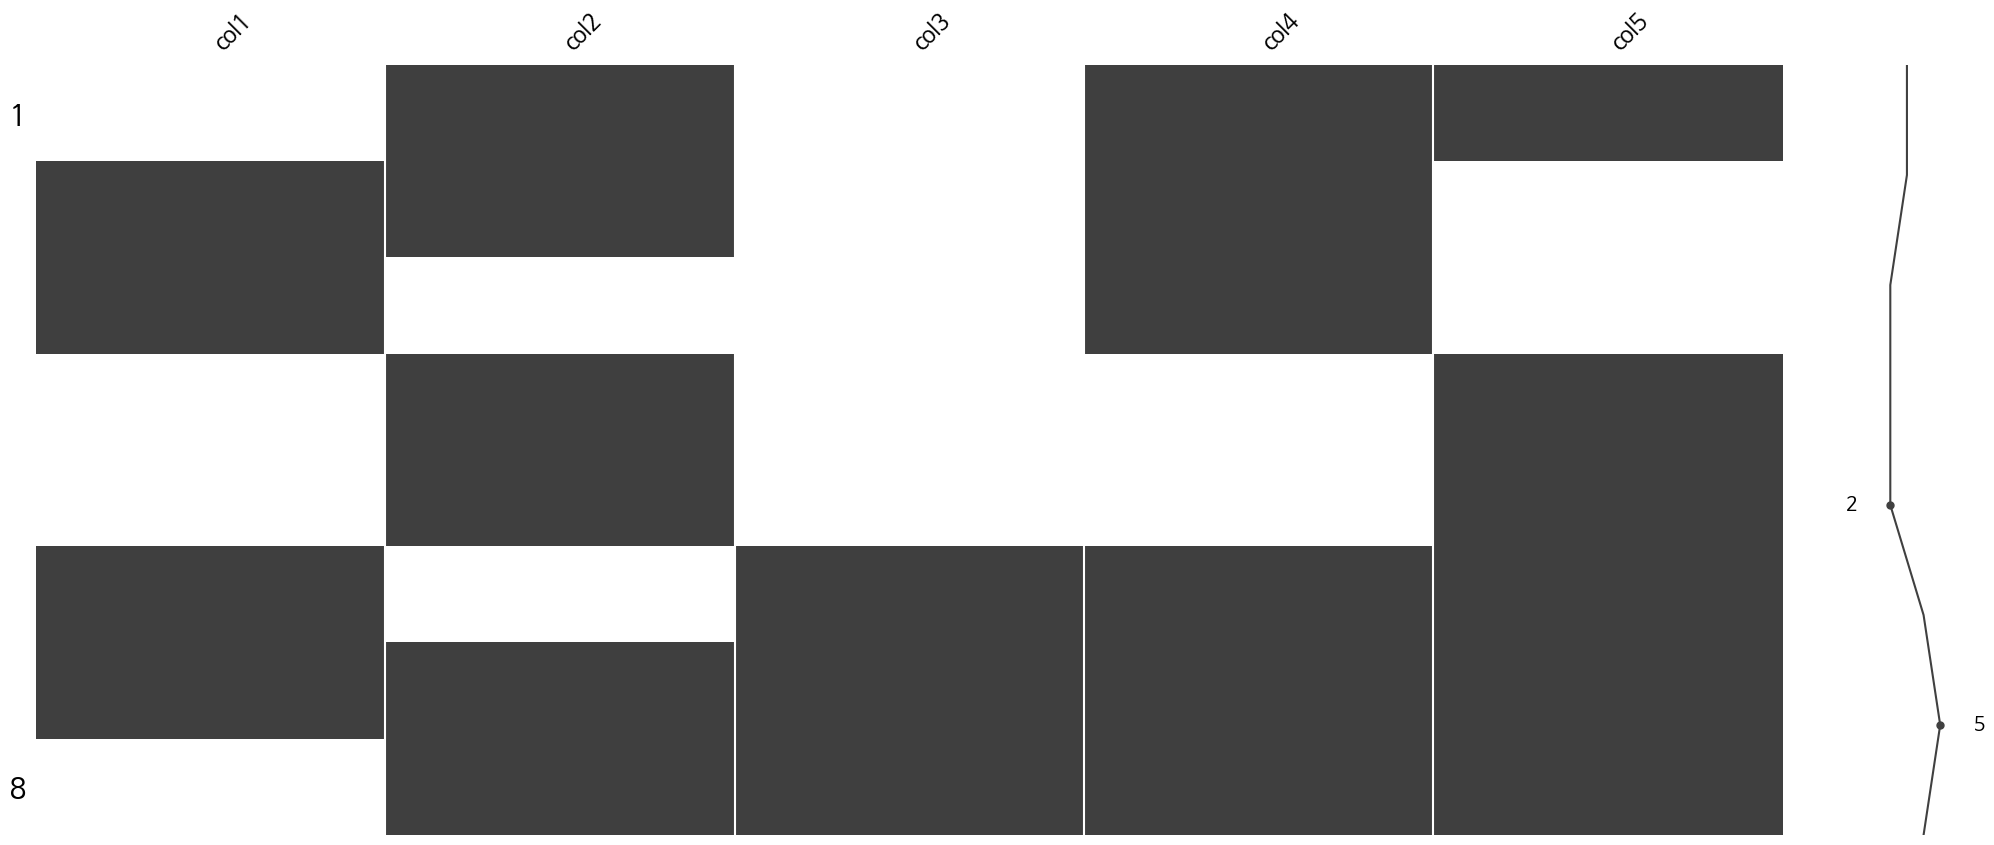

In [41]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

col  = ['col1','col2','col3','col4','col5']
na = np.nan
data = [[na, 2,na, 4,5],
        [ 6, 7,na, 9,na],
        [11,na,na,14,na],
        [na,17,na,na,20],
        [na,22,na,na,25],
        [16, na, 7, 17, 30],
        [21, 34, 14, 25, 35],
        [na, 42, 21, 38, 40]]
df = pd.DataFrame(data)
df.columns=col

msno.matrix(df)
plt.show()

만약 각 열에 결측 데이터가 얼마나 존재하는지 시각화 하고 싶다면, `bar()` 함수를 사용한다.

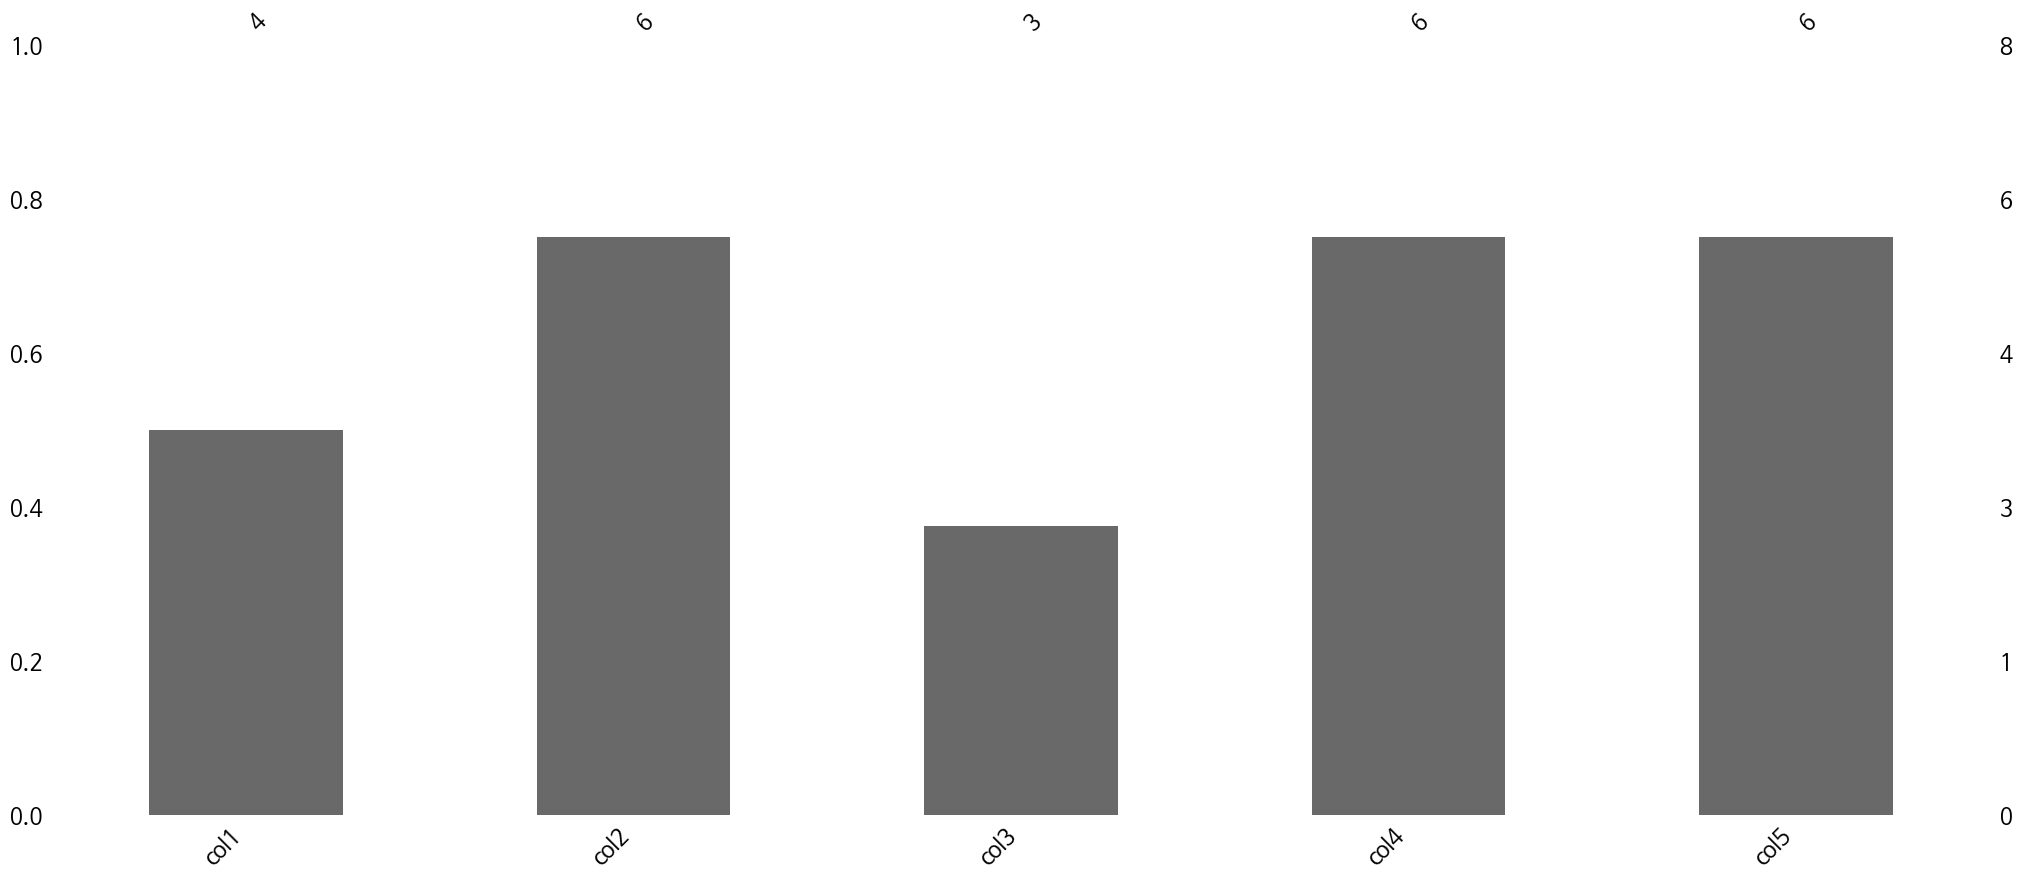

In [42]:
msno.bar(df)
plt.show()

대규모 데이터에서 missingno 패키지가 어떻게 쓰일 수 있는지 살펴보기 위해 타이나닉 생존자 데이터를 예로 들어본다. 타이타닉 생존자 데이터는 seaborn 패키지에서 제공하는 예제 데이터다. 

In [43]:
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


각 열이 의미하는 바는 다음과 같다.

* survived : 생존 여부
* pclass : 승객의 클래스
* sex : 성별. male, female로 표기
* sibsp : 형제 혹은 자매의 수
* parch : 부모 혹은 자녀의 수
* fare : 탑승 요금
* embarked : 출발지의 고유 이니셜
* class : 선실의 클래스
* who : male, female을 man, woman으로 표기
* adult_male : 성인 남성 인지 아닌지 여부
* deck : 선실 고유 번호의 가장 앞자리 알파벳(A ~ G)
* embark_town : 출발지
* alive : 생존 여부 데이터를 yes 혹은 no로 표기
* alone : 가족이 없는 경우 True

missingno를 이용하여 타이타닉 데이터를 살펴보면 age, deck, embarkd, embark_town 열 등에 결측 데이터가 있는 것을 볼 수 있다.

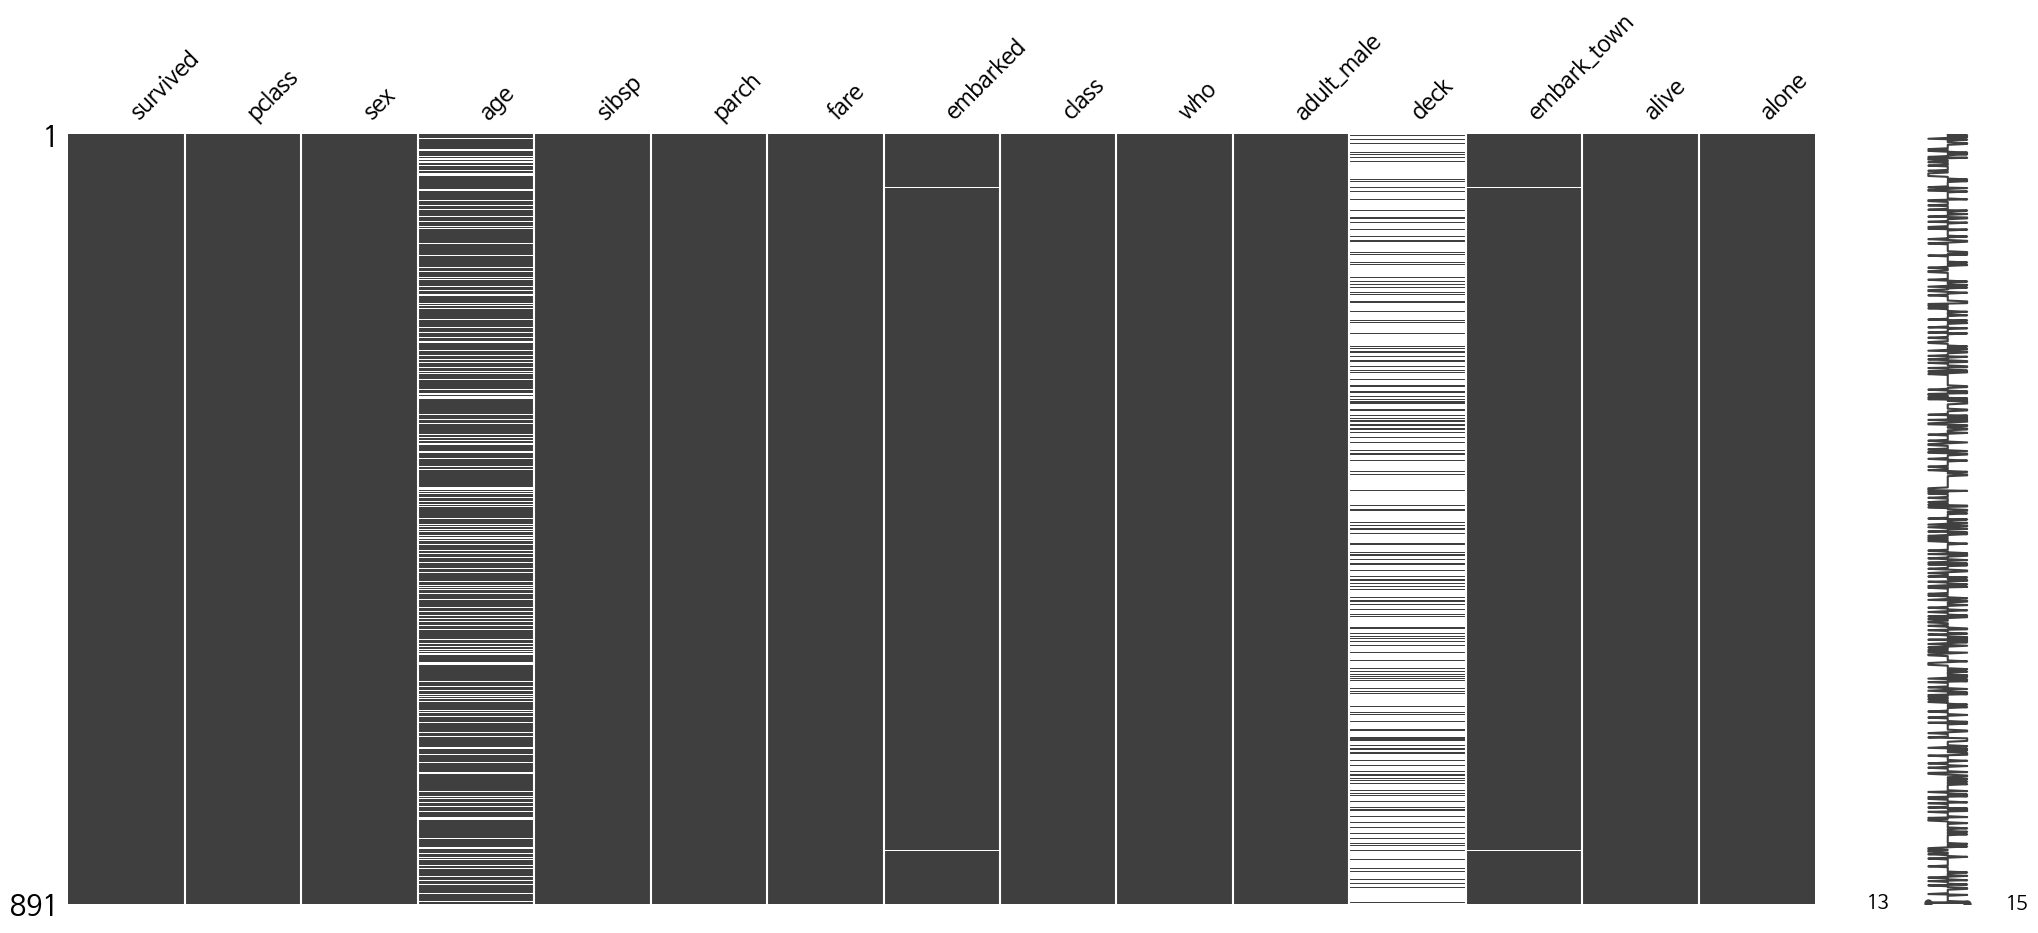

In [44]:
msno.matrix(titanic)
plt.show()

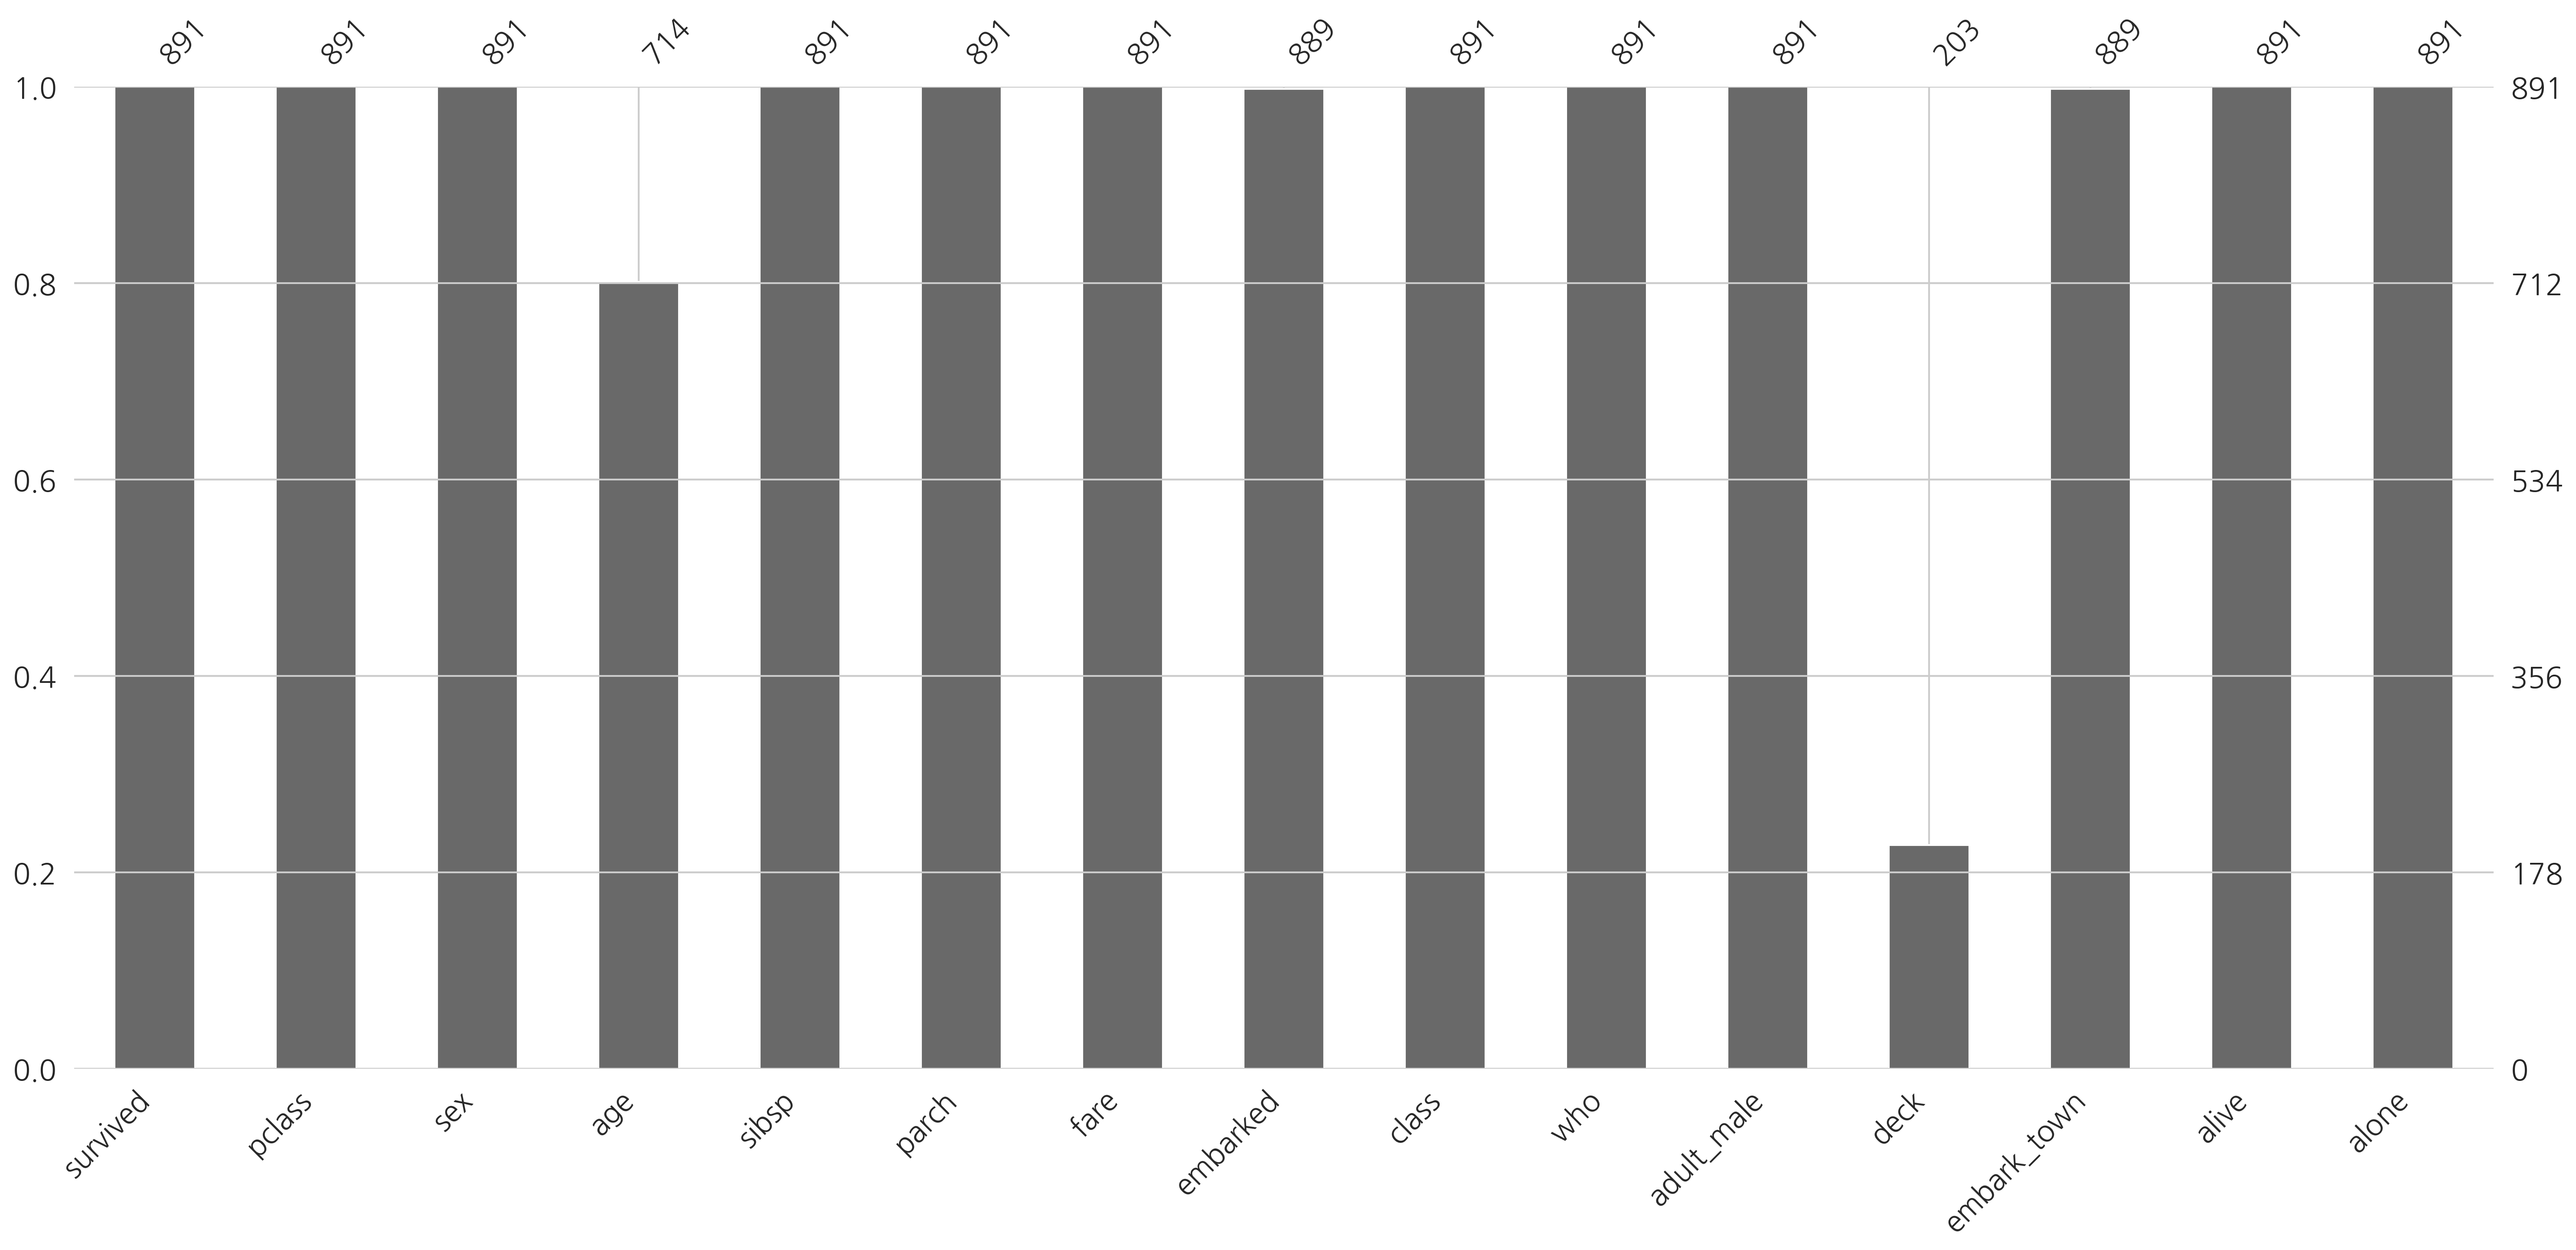

In [ ]:
msno.bar(titanic)
plt.show()

이번에는 타이타닉 데이터에서 embark_town 데이터부터 대체해보자. 이 값은 범주값이므로 `strategy="most_frequent"`로 하여 최빈값을 대체값으로 사용한다. 대체하기 전의 embark_town 데이터 분포를 살펴보면 Southhamton 값이 가장 많다. 대체 후에는 이 값으로 결측 데이터가 대체될 것이다.

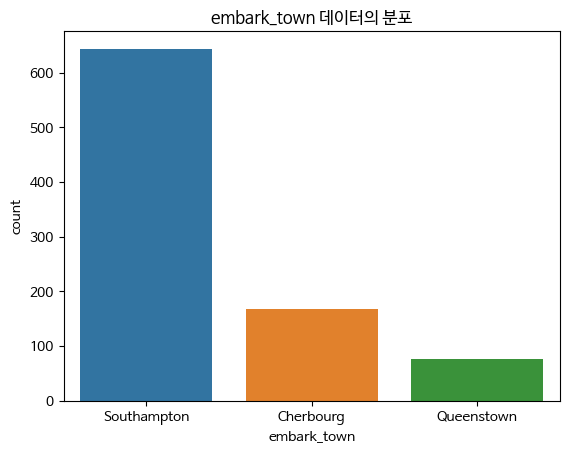

In [46]:
sns.countplot(x='embark_town', data=titanic)
plt.title("embark_town 데이터의 분포")
plt.show()

대체를 한 결과는 다음과 같다. `embarked` 데이터도 사실상 같은 데이터이므로 같이 대체한다.

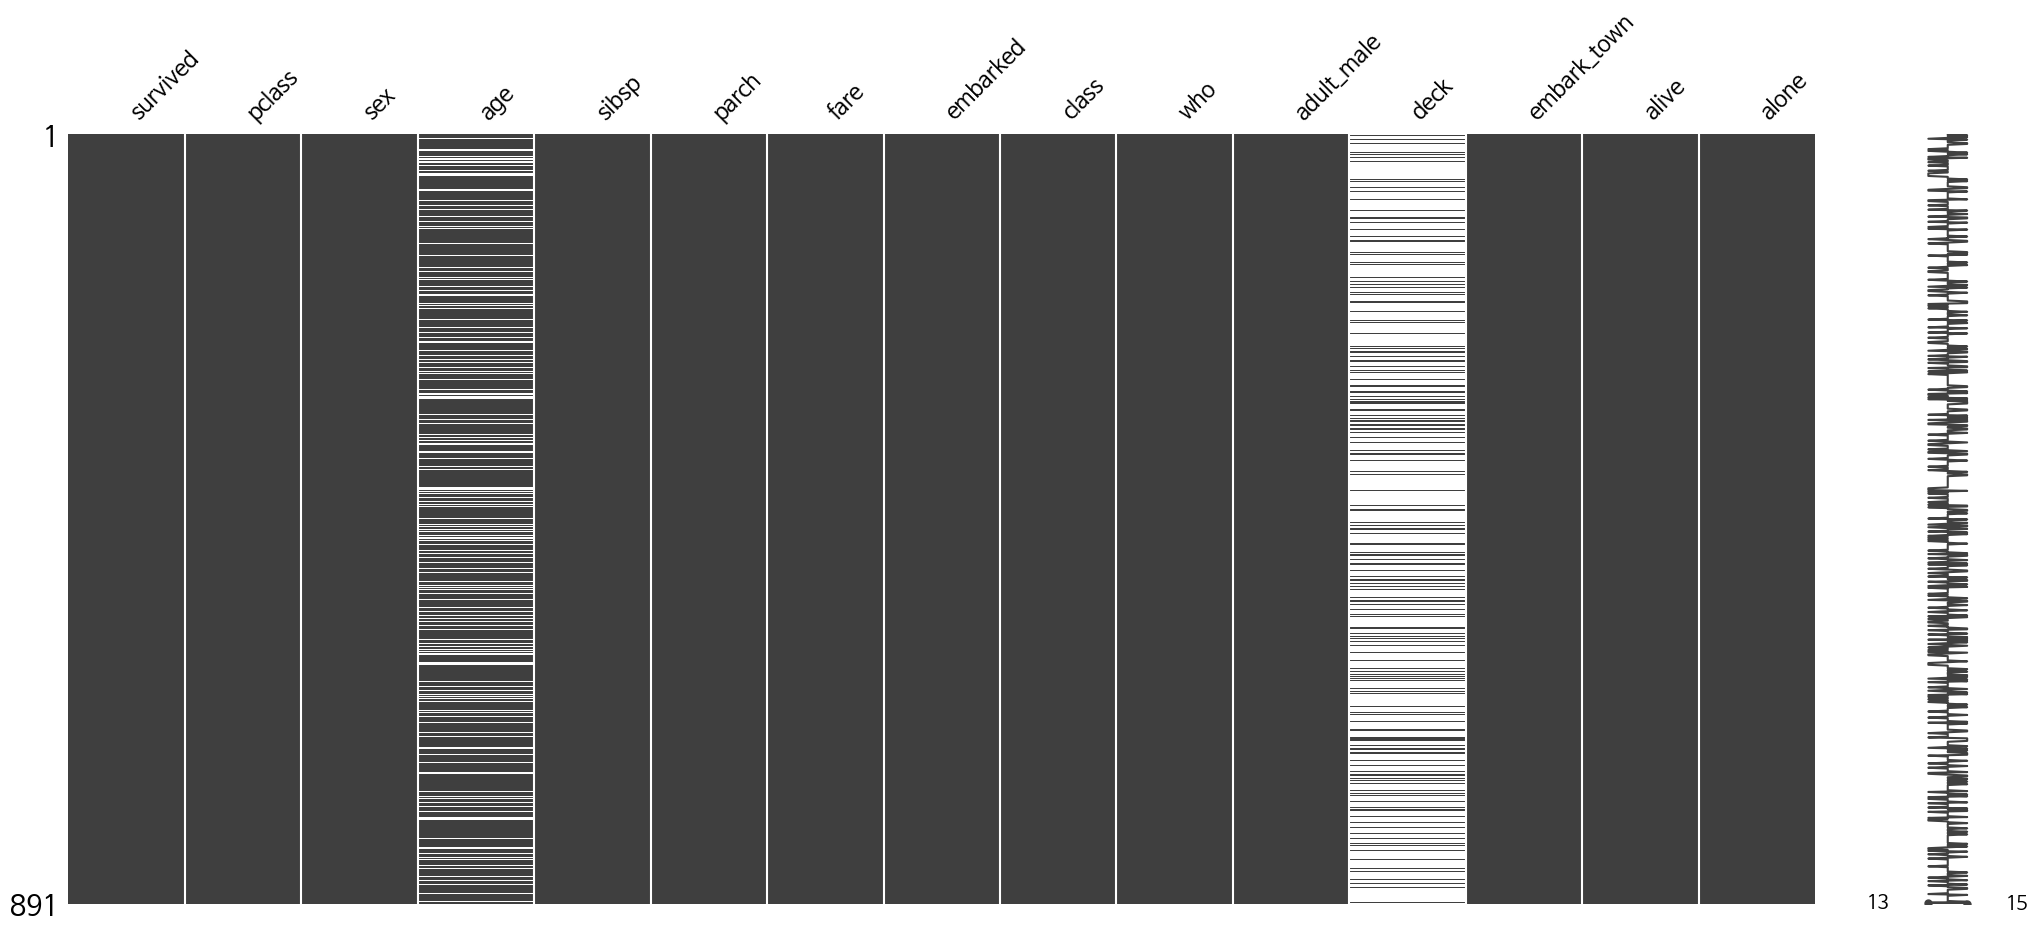

In [56]:
from scipy import stats
def mode(list):
    return max(list, key = lambda x: list.count(x))

titanic['embark_town'].fillna(mode(list(titanic['embark_town'])), inplace=True)
titanic['embarked'].fillna(mode(list(titanic['embarked'])), inplace=True)
msno.matrix(titanic)
plt.show()

다음으로 age 데이터를 대체한다. 대체하기 전의 age 데이터 분포를 살펴보면 비대칭인 것을 볼 수 있다.

c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


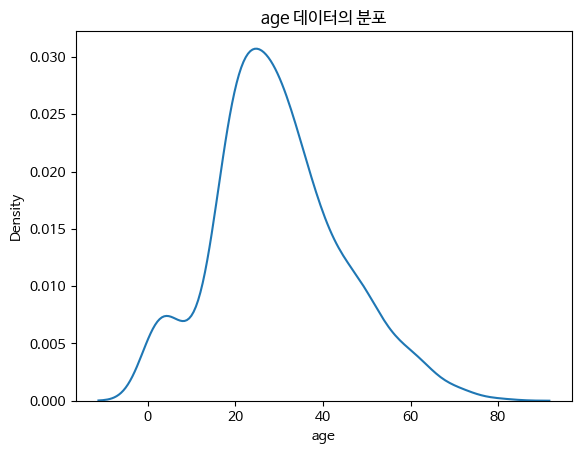

In [57]:
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.show()

따라서 중앙값을 대체값으로 사용한다. `fillna` 코드를 이용하면 다음 그림에서 결측값이 사라진 것을 확인할 수 있다. 

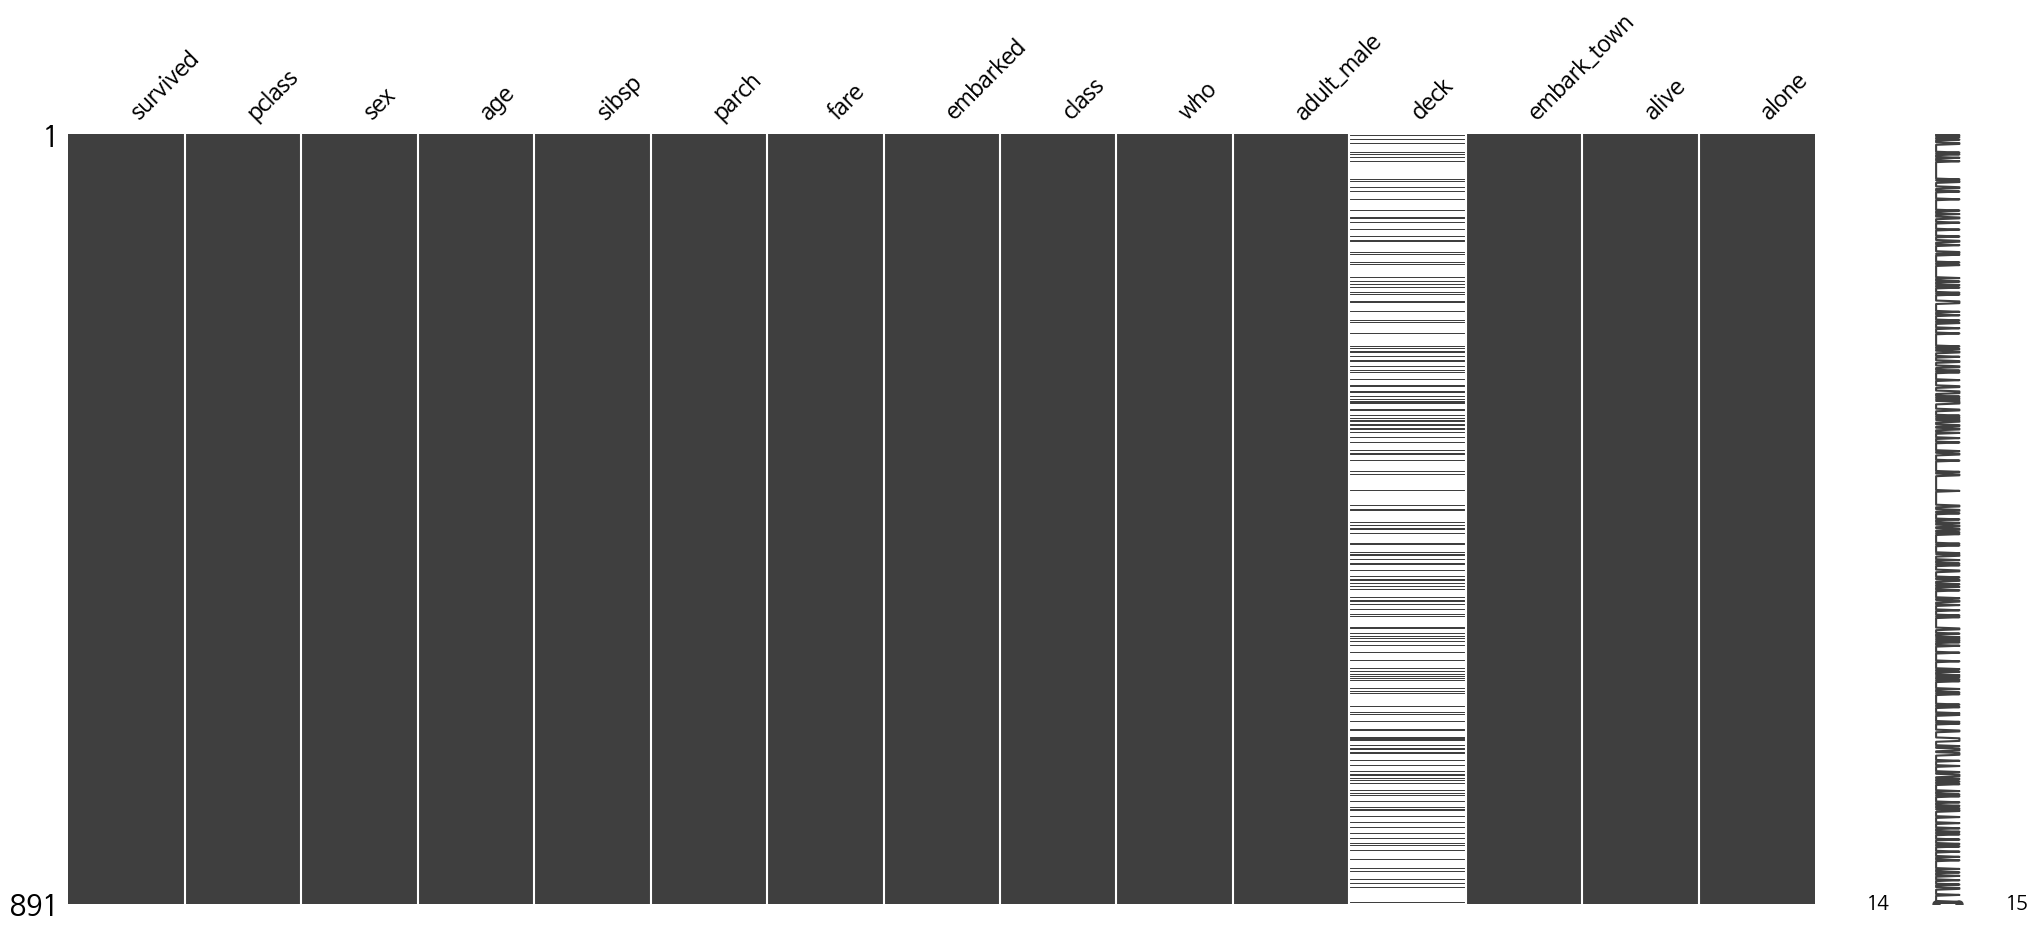

In [58]:
titanic["age"].fillna(np.nanmedian(titanic['age']), inplace=True)
msno.matrix(titanic)
plt.show()